## Survival

### Rank and Crowding

The original survival strategy proposed in [NSGA-II](../algorithms/moo/nsga2.ipynb#nsga-ii-non-dominated-sorting-genetic-algorithm) <cite data-cite="nsga2"></cite> ranks solutions in fronts by dominance criterion and uses a diversity metric denoted crowding distances to sort individuals in each front. This is used as criterion to compare individuals in elitist parent selection schemes and to truncate the population in the survival selection stage of algorithms.

Variants of the original algorithm have been proposed in the literature to address different performance aspects. Therefore the class ``RankAndCrowding`` from pymoo is a generalization of NSGA-II's survival in which several crowding metrics can be used. Some are already implemented and can be parsed as strings in the ``crowding_func`` argument, while others might be defined from scratch and parsed as callables. The ones available are:

- **Crowding Distance** (*'cd'*): Proposed by Deb et al. <cite data-cite="nsga2"></cite> in NSGA-II.
- **Pruning Crowding Distance** (*'pruning-cd'* or *'pcd'*): Proposed by Kukkonen & Deb <cite data-cite="gde3pruning"></cite>, it recursively recalculates crowding distances as removes individuals from a population to improve diversity.
- ***M*-Nearest Neighbors** (*'mnn'*): Proposed by Kukkonen & Deb <cite data-cite="gde3many"></cite> in an extension of GDE3 to many-objective problems.
- **2-Nearest Neighbors** (*'2nn'*): Also proposed by Kukkonen & Deb <cite data-cite="gde3many"></cite>, it is a variant of M-Nearest Neighbors in which the number of neighbors is two.
- **Crowding Entropy** (*'ce'*): Proposed by Wang et al. <cite data-cite="mosade"></cite> it considers the relative position of a solution between its neighors.

We encourage users to try ``crowding_func='pcd'`` for two-objective problems and ``crowding_func='mnn'`` for problems with more than two objectives.

If callable, it has the form ``fun(F, filter_out_duplicates=None, n_remove=None, **kwargs)`` in which F (n, m) and must return metrics in a (n,) array.

The ``ConstrRankAndCrowding`` class has the constraint handling approach proposed by Kukkonen, S. & Lampinen, J. <cite data-cite="gde3"></cite> implemented in which solutions are also sorted in constraint violations space.

In the following examples the code for plotting was ommited although it is available in the [end of the page](#plots).

In [13]:
# Pymoo imports
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.survival.rank_and_crowding import RankAndCrowding
from pymoo.problems import get_problem
from pymoo.optimize import minimize

# External imports
import matplotlib.pyplot as plt

In [14]:
# Problem definition Truss-2d - a two-objective problem
problem = get_problem("truss2d")

# Algorithms
nsga2 = NSGA2(70, survival=RankAndCrowding(crowding_func="cd"))
nsga2_p = NSGA2(70, survival=RankAndCrowding(crowding_func="pcd"))

# Minimization results
res_nsga2 = minimize(
    problem,
    nsga2,
    ('n_gen', 200),
    seed=12,
)

# Minimization results
res_nsga2_p = minimize(
    problem,
    nsga2_p,
    ('n_gen', 200),
    seed=12,
)

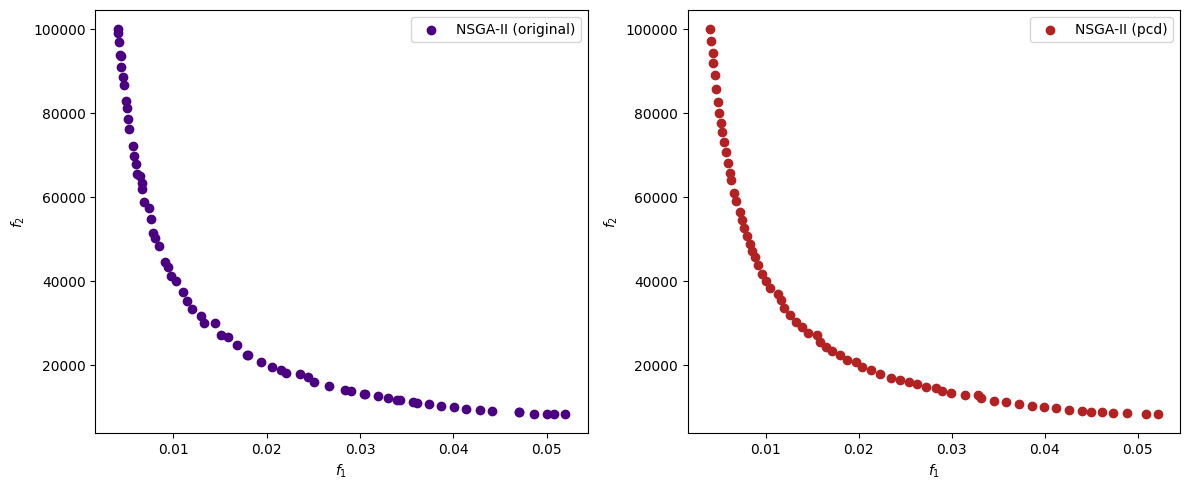

In [ ]:
# Problem definition DTLZ2 - a three-objective problem
problem = get_problem("dtlz2")

# Algorithms
nsga2 = NSGA2(130, survival=RankAndCrowding(crowding_func="cd"))
nsga2_mnn = NSGA2(130, survival=RankAndCrowding(crowding_func="mnn"))

# Minimization results
res_nsga2 = minimize(
    problem,
    nsga2,
    ('n_gen', 150),
    seed=12,
)

# Minimization results
res_nsga2_mnn = minimize(
    problem,
    nsga2_mnn,
    ('n_gen', 150),
    seed=12,
)

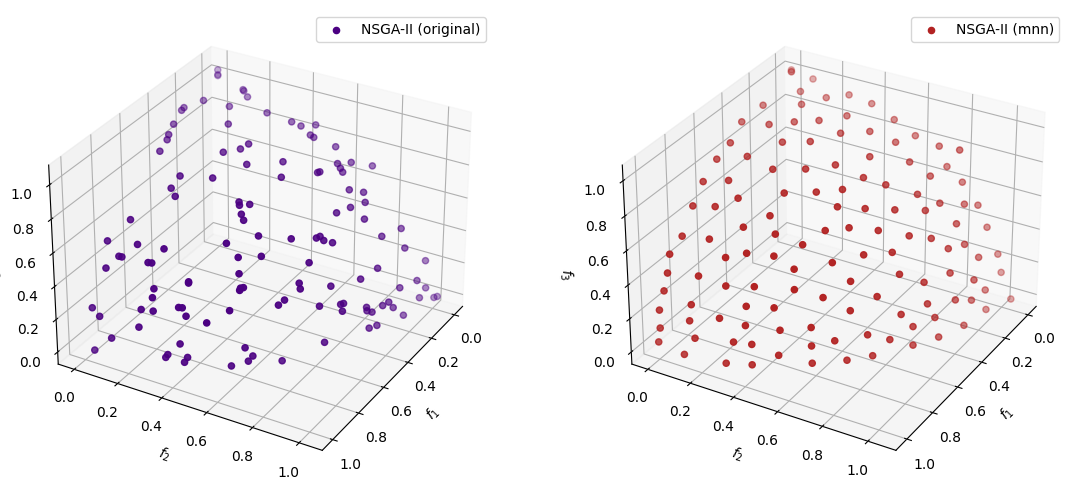

#### API

#### Plots

```python
fig, ax = plt.subplots(1, 2, figsize=[12, 5], dpi=100)

ax[0].scatter(
    res_nsga2.F[:, 0], res_nsga2.F[:, 1],
    color="indigo", label="NSGA-II (original)", marker="o",
)
ax[0].set_ylabel("$f_2$")
ax[0].set_xlabel("$f_1$")
ax[0].legend()

ax[1].scatter(
    res_nsga2_p.F[:, 0], res_nsga2_p.F[:, 1],
    color="firebrick", label="NSGA-II (pcd)", marker="o",
)
ax[1].set_ylabel("$f_2$")
ax[1].set_xlabel("$f_1$")
ax[1].legend()

fig.tight_layout()
plt.show()
```

```python
fig, ax = plt.subplots(1, 2, figsize=[12, 5], dpi=100, subplot_kw={'projection':'3d'})

ax[0].scatter(
    res_nsga2.F[:, 0], res_nsga2.F[:, 1], res_nsga2.F[:, 2],
    color="indigo", label="NSGA-II (original)", marker="o",
)
ax[0].set_ylabel("$f_2$")
ax[0].set_xlabel("$f_1$")
ax[0].set_zlabel("$f_3$")
ax[0].legend()

ax[1].scatter(
    res_nsga2_mnn.F[:, 0], res_nsga2_mnn.F[:, 1], res_nsga2_mnn.F[:, 2],
    color="firebrick", label="NSGA-II (mnn)", marker="o",
)
ax[1].set_ylabel("$f_2$")
ax[1].set_xlabel("$f_1$")
ax[1].set_zlabel("$f_3$")
ax[1].legend()

ax[0].view_init(elev=30, azim=30)
ax[1].view_init(elev=30, azim=30)

fig.tight_layout()
plt.show()
```